In [ ]:
#import Library yang diperlukan dalam program 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from google.colab import files
import zipfile
import os
import sys
import shutil
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


In [ ]:
#import dataset rockpaperscissors (menggunakan link)
#bila tidak ditambah -O /tmp/rockpaperscissors.zip terjadi error
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-06-28 23:45:35--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.27MB/s    in 43s     

2021-06-28 23:46:19 (7.19 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
#ekstraksi file zip : rockpaperscissors
file_zip='/tmp/rockpaperscissors.zip'
file_utama='/tmp/rockpaperscissors/rps-cv-images'
zip_extract=zipfile.ZipFile(file_zip, 'r')
zip_extract.extractall('/tmp')
zip_extract.close()


In [ ]:
#isi dari direktori file_utama
os.listdir(file_utama)

['README_rpc-cv-images.txt', 'scissors', 'paper', 'rock']

In [ ]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest',
    validation_split=0.4
)
test_datagen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.4
)

In [ ]:
train_generator=train_datagen.flow_from_directory(
    file_utama,
    target_size=(100, 150),
    class_mode='categorical',#multikelas
    subset='training'
)

validation_generator=test_datagen.flow_from_directory(
    file_utama,
    target_size=(100, 150),
    class_mode='categorical',#multikelas
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),#mencegah overfitting
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',#multikelas
    optimizer = tf.optimizers.Adam(),
    metrics = ['accuracy']               
)              

In [ ]:
accuracy_threshold = 98e-2
class my_callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        if logs.get('accuracy') >= accuracy_threshold:
            print('\nUntuk Epoch', epoch, '\nAkurasi mencapai = %2.2f%%' %(logs['accuracy']*100), 'training telah berhenti')
            self.model.stop_training = True

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2,
    callbacks = [my_callbacks()]
)

Epoch 1/20
25/25 - 29s - loss: 1.1024 - accuracy: 0.3494 - val_loss: 1.0292 - val_accuracy: 0.3812
Epoch 2/20
25/25 - 28s - loss: 0.8416 - accuracy: 0.6143 - val_loss: 0.6729 - val_accuracy: 0.7563
Epoch 3/20
25/25 - 28s - loss: 0.4824 - accuracy: 0.8130 - val_loss: 0.3209 - val_accuracy: 0.9000
Epoch 4/20
25/25 - 28s - loss: 0.3316 - accuracy: 0.8688 - val_loss: 0.1870 - val_accuracy: 0.9375
Epoch 5/20
25/25 - 28s - loss: 0.2264 - accuracy: 0.9187 - val_loss: 0.2701 - val_accuracy: 0.9187
Epoch 6/20
25/25 - 28s - loss: 0.2111 - accuracy: 0.9287 - val_loss: 0.1108 - val_accuracy: 0.9688
Epoch 7/20
25/25 - 28s - loss: 0.2165 - accuracy: 0.9299 - val_loss: 0.1735 - val_accuracy: 0.9563
Epoch 8/20
25/25 - 28s - loss: 0.1845 - accuracy: 0.9275 - val_loss: 0.1001 - val_accuracy: 0.9750
Epoch 9/20
25/25 - 27s - loss: 0.1366 - accuracy: 0.9532 - val_loss: 0.2174 - val_accuracy: 0.9438
Epoch 10/20
25/25 - 28s - loss: 0.1492 - accuracy: 0.9450 - val_loss: 0.0770 - val_accuracy: 0.9812
Epoch 11/

In [ ]:
print(train_generator.class_indices)#ingin mengetahui kelas dengan klasifikasi 0/1/2

{'paper': 0, 'rock': 1, 'scissors': 2}


Saving gunting.jpg to gunting.jpg
gunting.jpg
scissors


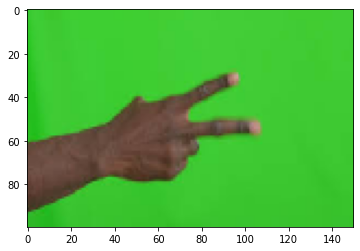

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  #prediksi gambar
  path = fn
  img_source = image.load_img(path, target_size = (100, 150))
  imgplot = plt.imshow(img_source)
  x = image.img_to_array(img_source)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)


  print(fn)
  if classes[0, 0] == 1:
    print('paper')
  elif classes[0, 1] == 1:
    print('rock')
  elif classes[0, 2] == 1:
    print('scissors')